# EVERYTHING IS CHAOS

In [1]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [70]:
df = pd.read_csv("/Users/rachelroca/Documents/Documents/GitHub/DAAAAMNdjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))
df

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1125,1125,1218635334251999232,noellebeckman,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:44:39.000Z,1218635334251999232,en,False,1660843818,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."
1127,1128,1218630899404640256,numberdance,RT @sbagley: Kelly MacArthur now speaking abou...,2020-01-18T20:27:02.000Z,1218630899404640256,en,False,961503306,Twitter Web App,...,1,talk support,1,hashtags; influencers,1,math practice; humanize,0,,,"[amplification, hashtags, humanize, influencer..."


In [3]:
tweeters = df['user_username'].unique()
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']


In [4]:
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = len(df_temp)
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters

In [15]:
#testing because I'm paranoid
df_temp = pd.DataFrame({'a':[[1,2,3], [2,2,2]], 'b':[[4,5,6], [3,3,3]]})
df_temp['a'].sum()

[1, 2, 3, 2, 2, 2]

In [5]:
df_codes.columns[30]
#columns=[1,16,24,27,30]
codes_sum_temp 

['gender', 'humanize', 'talk support']

In [6]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array=df_codes_array.astype('i')

In [7]:
#let's try normalizing because data be wild
#divide each row by the number of tweets/retweets
df_codes_array_norm_tweet = np.zeros((len(tweeters),len(codes)))
for i in range(len(tweeters)):
    df_codes_array_norm_tweet[i] = df_codes_array[i]/num_tweets_retweets[i]

## Data Dist

In [76]:
tweeters

array(['mathyadriana', 'mathprofcarrie', 'pwr2dppl', 'xl772',
       'WanderingPoint', 'LoboWithACause', 'qsideinstitute', 'frontLahn',
       'RachelleDeCoste', 'monsoon0', 'elizabethmunch', 'MarissaKawehi',
       'fra_berni', 'HthrLynnJ', 'sbagley', 'thewordninja_bk',
       'matthematician', 'DrMRLD', 'VictorPiercey1', 'kmkinnaird',
       'jensilvermath', 'KJMDPhD', 'MattBoelkins', 'susan_dagostino',
       'FedericoArdila', 'MBarany', 'DrBKirkpatrick', 'CKalinecCraig',
       'BikeMath', 'evainfeld', 'belladoesmath', 'BenisConsumer',
       'BresockCalculus', 'katebelin', 'joshlaison', 'GailHWebster',
       'JohannaF_math', 'ClaudioJacobo', 'virtualcourtney', 'StatsSam',
       'EWhitteck', 'siwelwerd', 'Shelby_M_Scott', 'blkmathmagic',
       'darrenglass', 'SoledadVillar5', 'diazlopezmath', 'aksir',
       'benjamindickman', 'DrHenryGarrett', 'mathcourtney', 'kneppkatt',
       'swirlgirl31415', 'DrBrandyMath', 'AliciaPL25', 'GoodsiePhD',
       'DamienSBS', 'dtkung', 'jackson

Text(0, 0.5, 'Number of tweets/retweets')

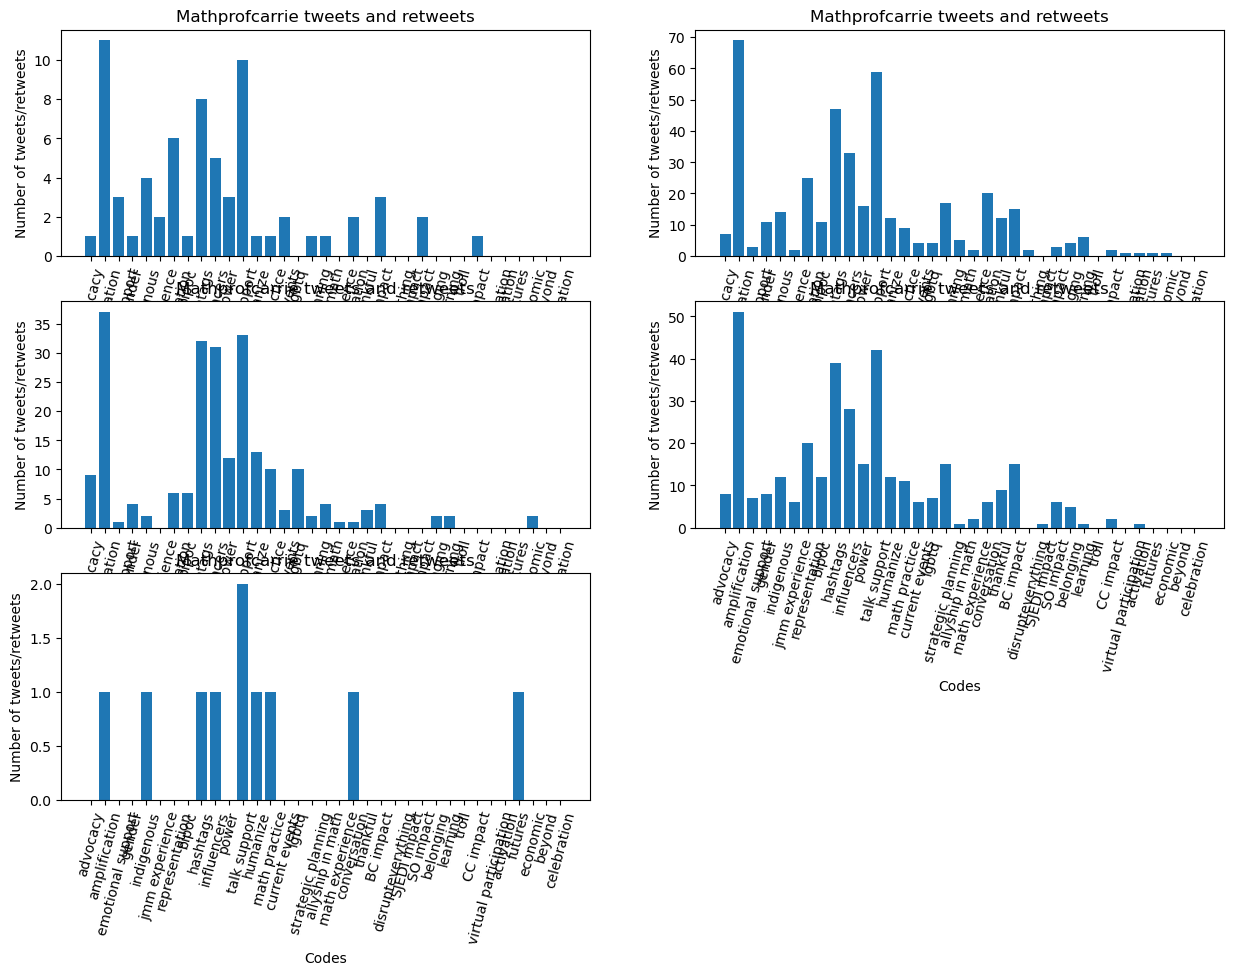

In [79]:
#top 5 in-degree people!!!
#making a bar chart/hist of mathprofcarries's tweets
plt.figure(figsize=(15,10))
plt.tight_layout()

plt.subplot(3,2,1)
plt.bar(codes, df_codes.loc['WanderingPoint'])
plt.xticks(rotation=75, fontsize=10)
plt.title('Mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

plt.subplot(3,2,2)
plt.bar(codes, df_codes.loc['mathprofcarrie'])
plt.xticks(rotation=75, fontsize=10)
plt.title('Mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

plt.subplot(3,2,3)
plt.bar(codes, df_codes.loc['sbagley'])
plt.xticks(rotation=75, fontsize=10)
plt.title('Mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

plt.subplot(3,2,4)
plt.bar(codes, df_codes.loc['pwr2dppl'])
plt.xticks(rotation=75, fontsize=10)
plt.title('Mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

plt.subplot(3,2,5)
plt.bar(codes, df_codes.loc['RG1gal'])
plt.xticks(rotation=75, fontsize=10)
plt.title('Mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')


Text(0, 0.5, 'Number of tweets/retweets')

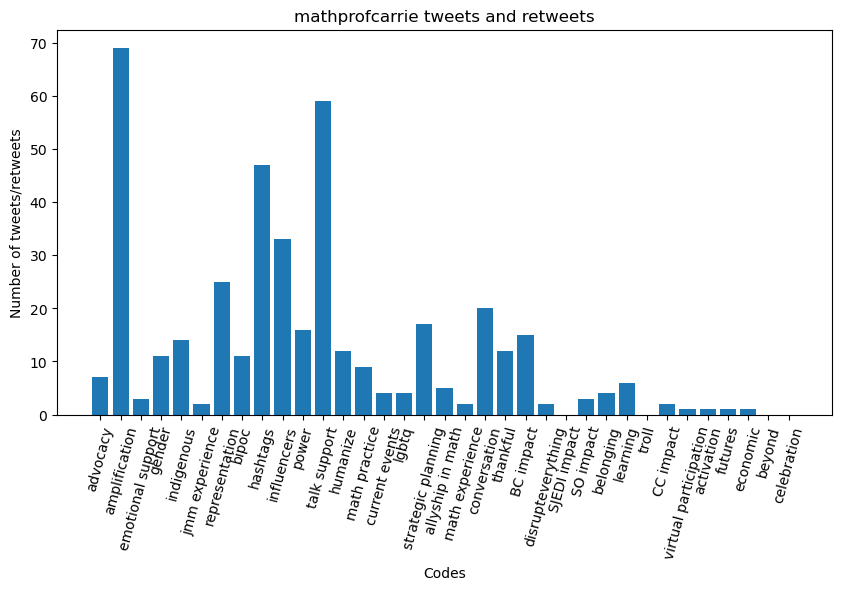

In [81]:
plt.figure(figsize=(10,5))
plt.bar(codes, df_codes.loc['mathprofcarrie'])
plt.xticks(rotation=75, fontsize=10)
plt.title('mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')


## Mapper

### L1 norm

In [54]:
#getting the filter function
def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

In [58]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=1, overlap_frac=0.35)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})
g = pipe.fit_transform(df_codes_array)

In [60]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=1, overlap_frac=0.35)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
fig.show(config={'scrollZoom': True})
g = pipe.fit_transform(df_codes_array_norm_tweet)

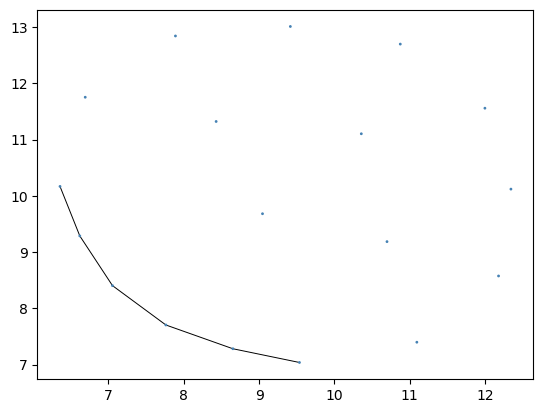

In [14]:
fig, ax = plt.subplots()
ig.plot(g,target=ax,palette=ig.RainbowPalette(),
    vertex_size=1,
    edge_width=0.7)
plt.show()

In [15]:
G = g.to_networkx()
fuck_this = nx.connected_components(G)
len(list(fuck_this))


13

In [16]:
#connected components igraph
fuck_me = ig.Graph.components(g)
print(fuck_me)

Clustering with 18 elements and 13 clusters
[ 0] 0, 3, 4, 6, 7, 8
[ 1] 1
[ 2] 2
[ 3] 5
[ 4] 9
[ 5] 10
[ 6] 11
[ 7] 12
[ 8] 13
[ 9] 14
[10] 15
[11] 16
[12] 17


In [17]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = l1_norm_trans

for i in nints:
    for j in olfrac:
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(i), overlap_frac=j)
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )

        fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
        #fig.show(config={'scrollZoom': True})
        #fig.write_image('figures/ints_'+str(i)+'_olfrac'+str(j)+'.png')
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
    

In [18]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = l1_norm_trans
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

([<matplotlib.axis.YTick at 0x7fa64f6d90a0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

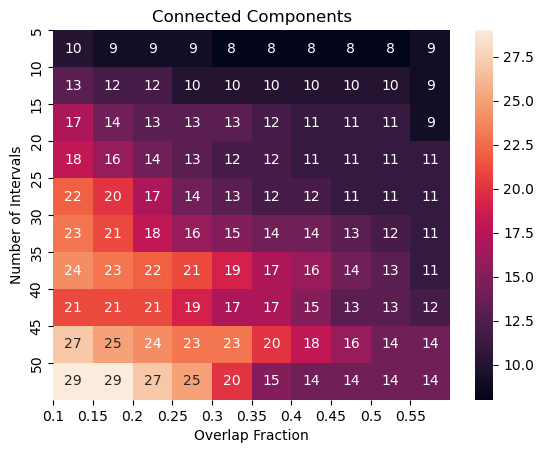

In [19]:
#make a heatmap of the connected components matrix
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa651bf5fa0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

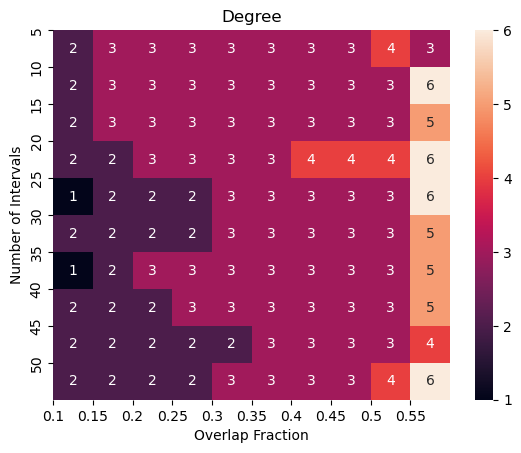

In [20]:
import seaborn as sns
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa651e9daf0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

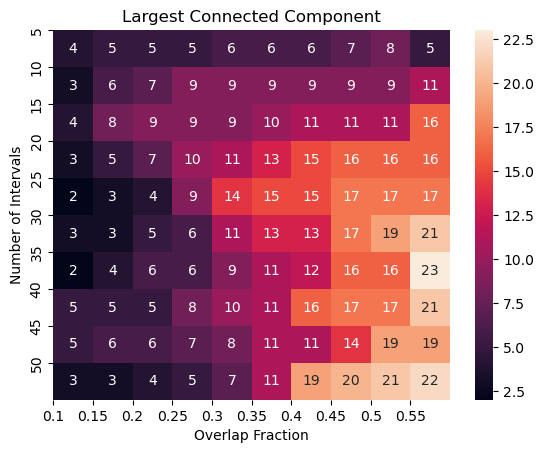

In [21]:
import seaborn as sns
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Eccentricity

In [22]:
def self_org(x):
    #columns=[1,16,24,27,30]
    #percent that is percrnt self organization
    
    

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

IndentationError: expected an indented block (767887398.py, line 7)

In [10]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Eccentricity() #default is p = 2, metric = 'euclidean'
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet,color_data=df_codes_array_norm_tweet,color_features=filter_func)
        fig.write_image('figures/eccentricity/ints_'+str(i)+'_olfrac'+str(j)+'.png')
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

In [36]:
cover = map.OneDimensionalCover(kind='uniform', n_intervals=1, overlap_frac=0.35)
clust = cluster.DBSCAN()
ff = map.Eccentricity()
pipe = map.make_mapper_pipeline(
    filter_func=ff,
    cover=cover,    
    clusterer=clust,
    verbose=False,
    n_jobs=1,
)

#fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet, color_data=df_codes_array_norm_tweet)
fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet, color_data=df_codes_array_norm_tweet,color_features=filter_func)
fig.show(config={'scrollZoom': True})
graph = pipe.fit_transform(df_codes_array_norm_tweet)

#check out 1, 8, 11, 26


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbd798f1730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd7991f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbd7990eb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd7991a9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd7a7634c0>],
 'means': []}

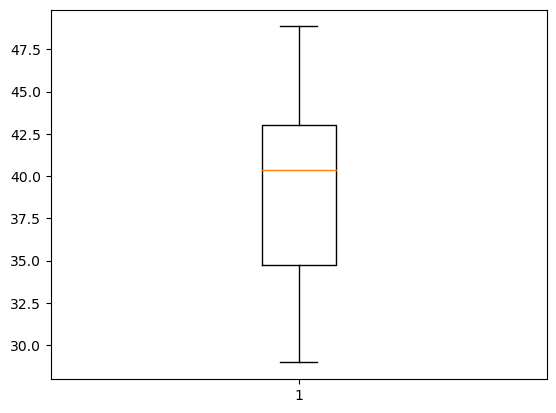

In [30]:
ecc = map.Eccentricity()
ecc_data = ecc.fit_transform(df_codes_array_norm_tweet)
plt.boxplot(ecc_data)

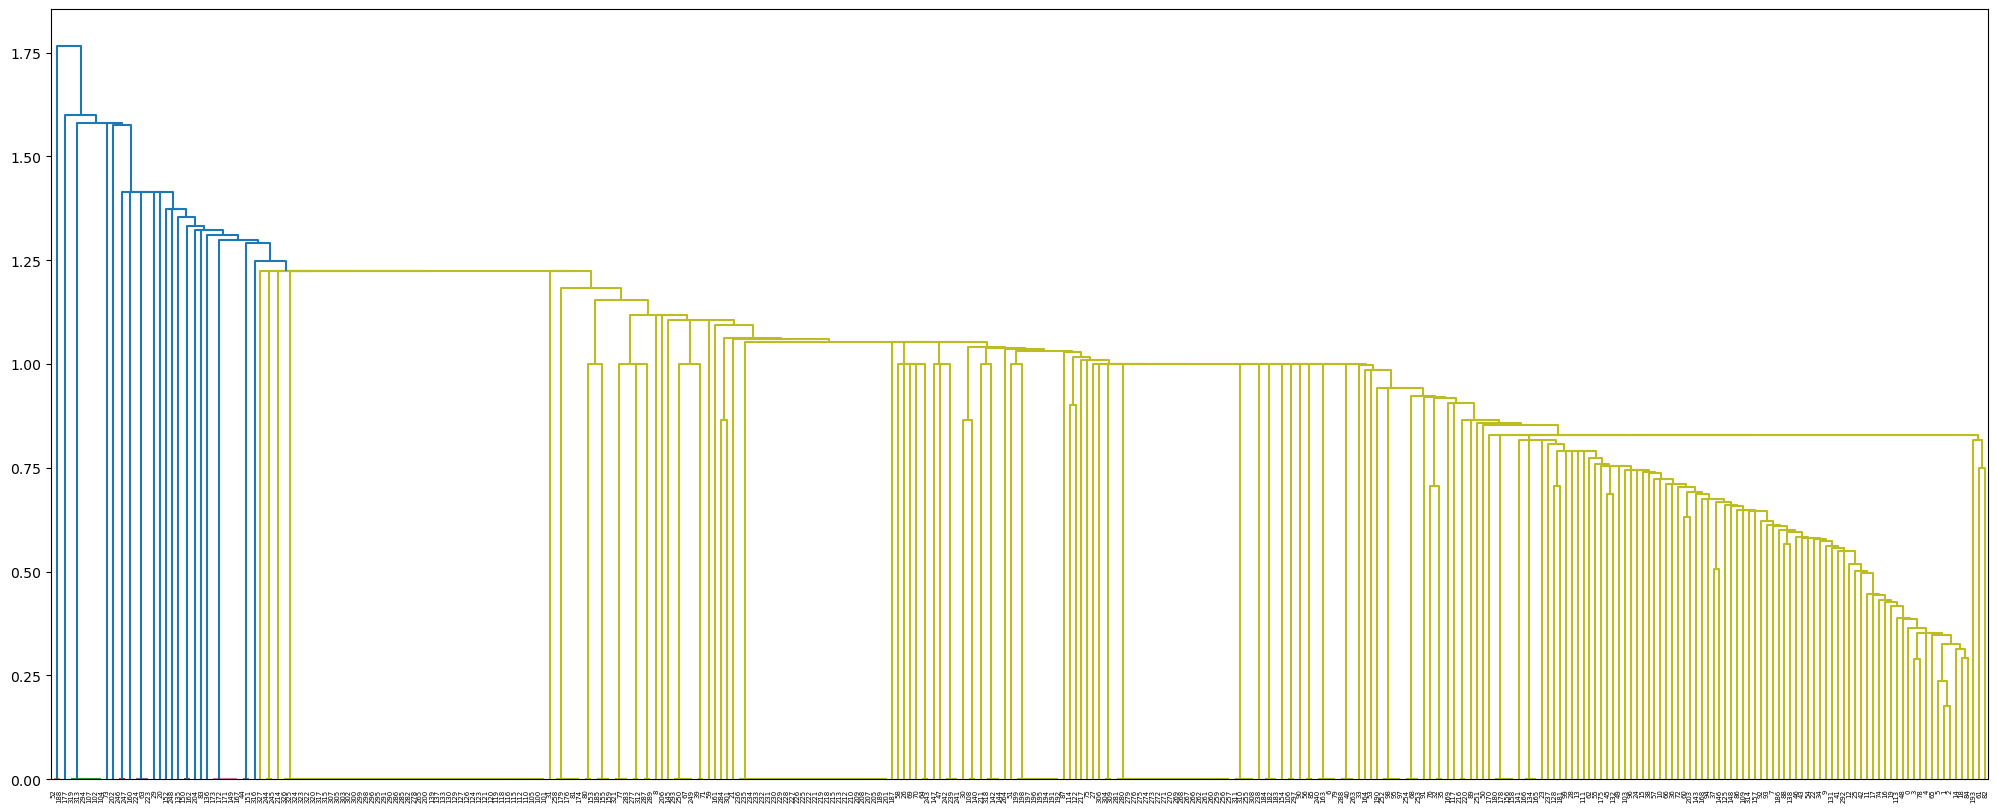

In [61]:
#dendrogram
import scipy.cluster.hierarchy as sch

link = sch.linkage(df_codes_array_norm_tweet, method='single')
fig = plt.figure(figsize=(25, 10))
dn = sch.dendrogram(link)
plt.show()


In [82]:
#let's actually do the dbscan
#I'm stupid, don't use ecc_data use the original data
from sklearn.cluster import DBSCAN

c = clusterer.fit_predict(df_codes_array)
#weird, no 9 clusters
c1=DBSCAN().fit_predict(df_codes_array)

#make sure all entries in c equal c1
print(np.array_equal(c,c1))
np.unique(c)

True


array([-1,  0,  1,  2,  3,  4,  5,  6])

In [83]:
graph = pipe.fit_transform(df_codes_array)
graph.vs.attributes()
node_elts = graph.vs["node_elements"]
node_elts

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 103, 106, 108, 109, 111,
        113, 114, 117, 122, 125, 128, 131, 132, 134, 135, 136, 138, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168,
        169, 170, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 190, 193, 202, 203, 204, 206, 211, 214, 216, 217, 220, 223,
        224, 237, 238, 239, 240, 241, 242, 243, 244

In [103]:
cluster1 = node_elts[0]
#get these rows from df_codes

#add normal index
df_codes_clusters = df_codes.reset_index(drop=False)
df_cluster1 = df_codes_clusters.loc[cluster1]
cluster1_code_sum = df_cluster1.iloc[:,1:].sum()
cluster1_code_sum



advocacy                 119
amplification            538
emotional support         72
gender                   148
indigenous               150
jmm experience            70
representation           220
bipoc                    111
hashtags                 386
influencers              310
power                    153
talk support             495
humanize                 133
math practice            118
current events            59
lgbtq                     46
strategic planning        99
allyship in math          45
math experience           15
conversation              56
thankful                  84
BC impact                112
disrupteverything         12
SJEDI impact              10
SO impact                 38
belonging                 32
learning                  32
troll                      5
CC impact                 10
virtual participation      9
activation                 7
futures                    9
economic                   3
beyond                     1
celebration   

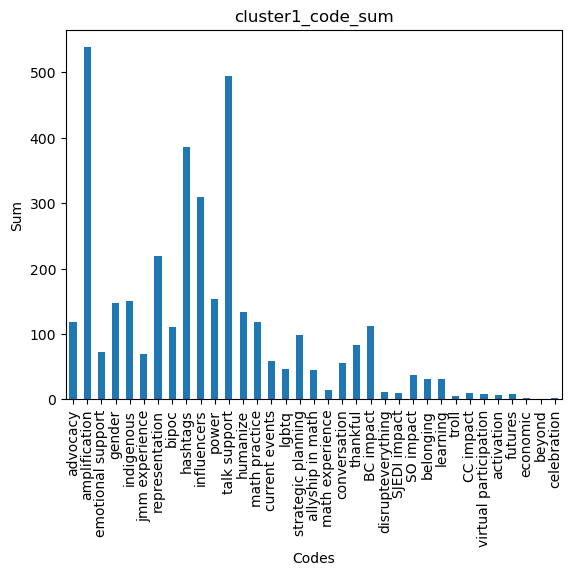

In [104]:
cluster1_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster1_code_sum')
plt.show()


([<matplotlib.axis.YTick at 0x7ff5ceb9cf40>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

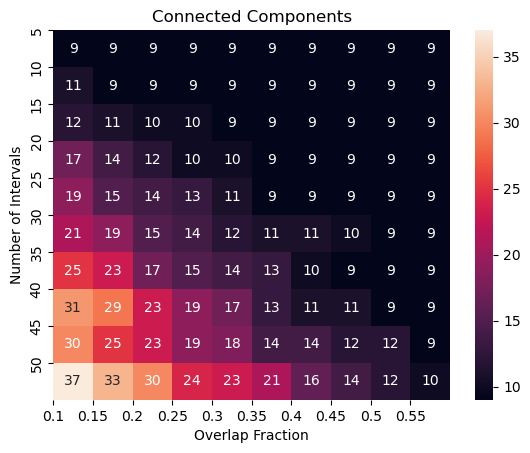

In [ ]:
#make a heatmap of the connected components matrix
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5ca49b970>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

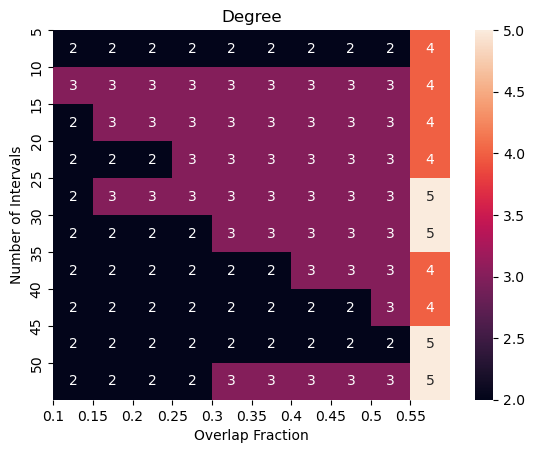

In [ ]:
import seaborn as sns
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5ca730df0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

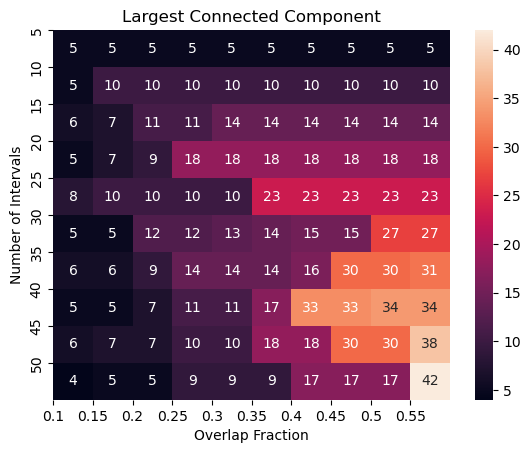

In [ ]:
import seaborn as sns
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Projecting onto Amplification Code

In [ ]:
#project onto amplification
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Projection(columns=[1])
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

([<matplotlib.axis.YTick at 0x7ff5c9124d60>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

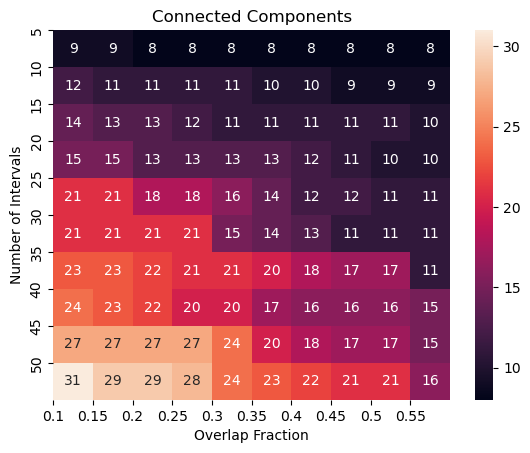

In [ ]:
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c8a530d0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

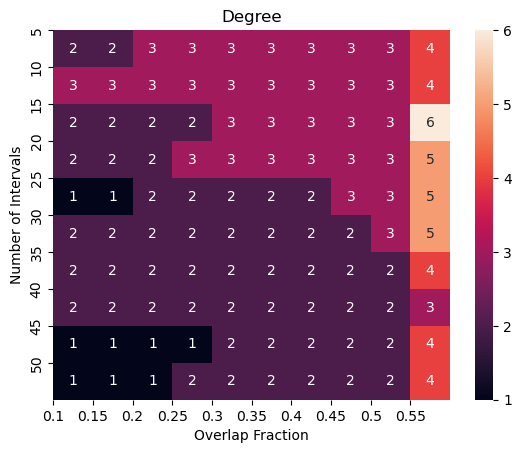

In [ ]:

sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c9535bb0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

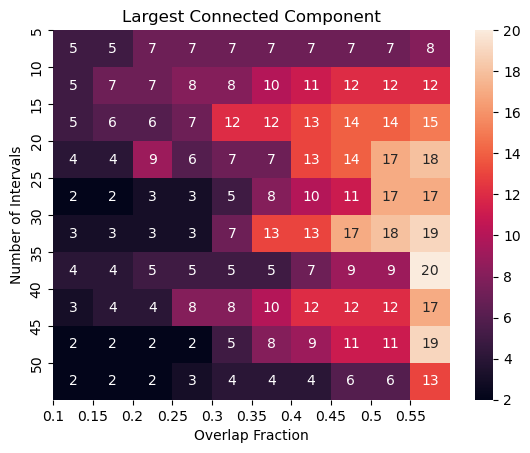

In [ ]:
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Projecting onto a set of codes (Self Organization Theme)
*warning: this is a work in progress and is a bit cranky*

In [ ]:
#project on SO (1,16,24,27,30)
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Projection(columns=[1,16,24,27,30])
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.CubicalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)


KeyboardInterrupt: 

([<matplotlib.axis.YTick at 0x7fa276cd9f70>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

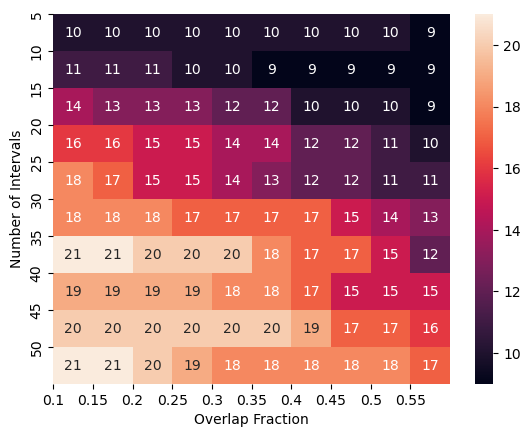

In [ ]:
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa2774a1e20>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

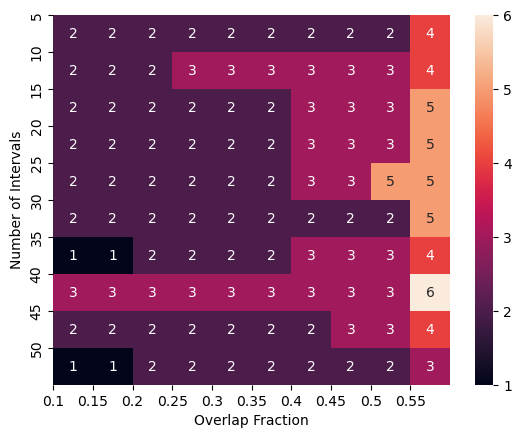

In [ ]:
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa271e5be20>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

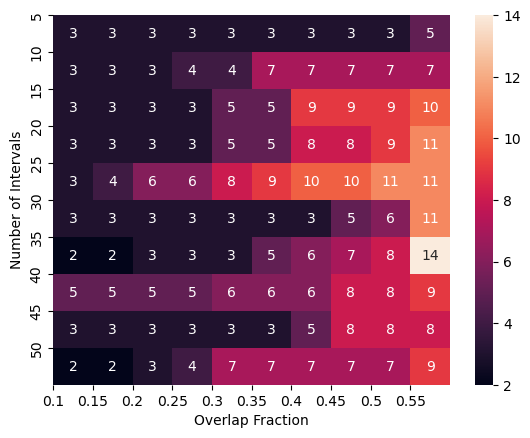

In [ ]:
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)